In [62]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

1.Connection

1.1.DF connection

In [63]:
# Replace the placeholders with your actual database credentials
username = 'root'
password = 'Mosimosi123#'
host = '127.0.0.1'  # or your database host
database = 'Chinook'

# Create the connection string
connection_string = f'mysql+mysqlconnector://{username}:{password}@{host}/{database}'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)


1.2. Create DF from DB table

In [64]:
# Get the list of all tables in the database
tables_query = "SHOW TABLES"
tables = pd.read_sql(tables_query, engine)

# Initialize a dictionary to hold DataFrames
df = {}

# Loop through each table and read data into separate DataFrames
for table in tables.values.flatten():  # Flatten the DataFrame to get table names
    query = f'SELECT * FROM {table}'
    df[table] = pd.read_sql(query, engine)

# Now you can access each DataFrame by its table name
# For example, to see the DataFrame for a specific table:
df['invoice']


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2021-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2021-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2021-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2021-01-11,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2025-12-05,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2025-12-06,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2025-12-09,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2025-12-14,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


2.EDA

2.1. Descriptive Analysis

for Each table: 1.track

1.1.Track:

In [65]:
df['track'].head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [66]:
df['track'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2526 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


In [67]:
df['track'].describe().T

,count,mean,std,min,25%,50%,75%,max
TrackId,3503.0,1.752000e+03,1.011373e+03,1.00,876.50,1752.00,2627.50,3.503000e+03
AlbumId,3503.0,1.409295e+02,8.177539e+01,1.00,70.50,141.00,212.00,3.470000e+02
MediaTypeId,3503.0,1.208393e+00,5.804430e-01,1.00,1.00,1.00,1.00,5.000000e+00
GenreId,3503.0,5.725378e+00,6.190204e+00,1.00,1.00,3.00,7.00,2.500000e+01
Milliseconds,3503.0,3.935992e+05,5.350054e+05,1071.00,207281.00,255634.00,321645.00,5.286953e+06
Bytes,3503.0,3.351021e+07,1.053925e+08,38747.00,6342566.00,8107896.00,10266789.50,1.059546e+09
UnitPrice,3503.0,1.050805e+00,2.390064e-01,0.99,0.99,0.99,0.99,1.990000e+00


--plot genre

In [68]:
df['track'].describe(include=['object']).T

,count,unique,top,freq
Name,3503,3257,Wrathchild,5
Composer,2526,853,Steve Harris,80


1.2.Track_info_table:

In [69]:
df['album'].describe(include=['object']).T

,count,unique,top,freq
Title,347,347,Koyaanisqatsi (Soundtrack from the Motion Pict...,1


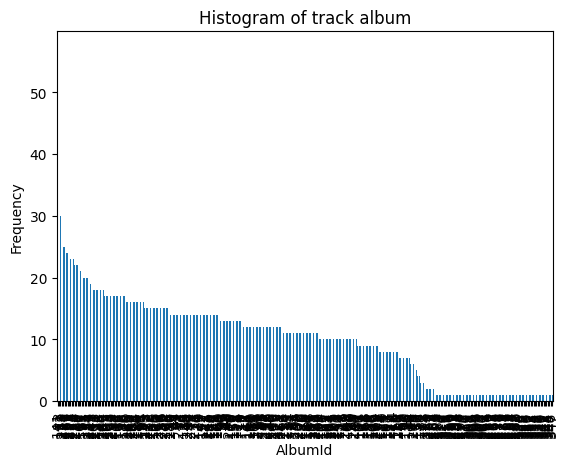

In [70]:
df['track']['AlbumId'].astype('category').value_counts().plot(kind='bar', title='Track Frequency')

plt.title('Histogram of track album')
plt.xlabel('AlbumId')
plt.ylabel('Frequency')
plt.show()

In [71]:
df['artist'].describe(include=['object']).T

,count,unique,top,freq
Name,275,275,Philip Glass Ensemble,1


In [72]:
df['playlist'].describe(include=['object']).T

,count,unique,top,freq
Name,18,14,Music,2


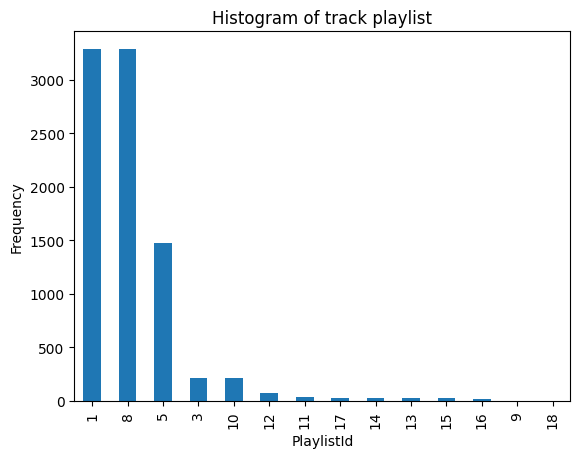

In [73]:
df['playlisttrack']['PlaylistId'].astype('category').value_counts().plot(kind='bar', title='Track Frequency')

plt.title('Histogram of track playlist')
plt.xlabel('PlaylistId')
plt.ylabel('Frequency')
plt.show()

In [74]:
df['genre'].describe(include=['object']).T

,count,unique,top,freq
Name,25,25,Rock,1


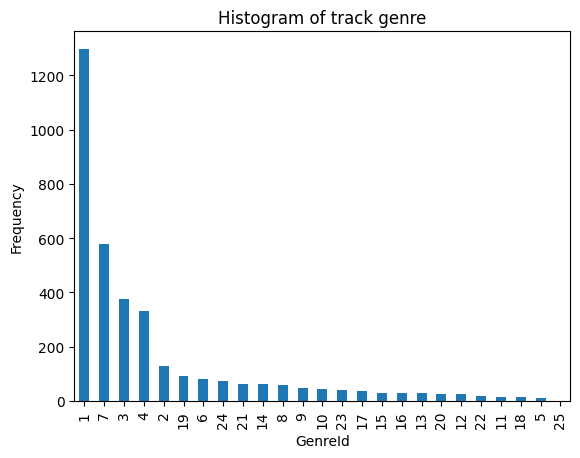

In [75]:
df['track']['GenreId'].astype('category').value_counts().plot(kind='bar', title='Track Frequency')

plt.title('Histogram of track genre')
plt.xlabel('GenreId')
plt.ylabel('Frequency')
plt.show()

In [76]:
df['mediatype'].describe(include=['object']).T

,count,unique,top,freq
Name,5,5,MPEG audio file,1


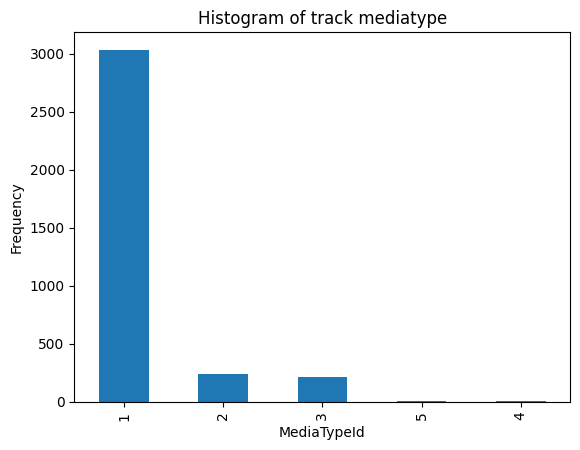

In [77]:
df['track']['MediaTypeId'].astype('category').value_counts().plot(kind='bar', title='Track Frequency')

plt.title('Histogram of track mediatype')
plt.xlabel('MediaTypeId')
plt.ylabel('Frequency')
plt.show()

2.Invoice

2.1.Invoice

In [78]:
df['invoice'].head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2021-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2021-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2021-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2021-01-11,69 Salem Street,Boston,MA,USA,2113,13.86


In [79]:
df['invoice'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceId          412 non-null    int64         
 1   CustomerId         412 non-null    int64         
 2   InvoiceDate        412 non-null    datetime64[ns]
 3   BillingAddress     412 non-null    object        
 4   BillingCity        412 non-null    object        
 5   BillingState       210 non-null    object        
 6   BillingCountry     412 non-null    object        
 7   BillingPostalCode  384 non-null    object        
 8   Total              412 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 29.1+ KB


In [80]:
df['invoice'].describe().T

,count,mean,min,25%,50%,75%,max,std
InvoiceId,412.0,206.5,1.0,103.75,206.5,309.25,412.0,119.078406
CustomerId,412.0,29.929612,1.0,15.0,30.0,45.0,59.0,17.010585
InvoiceDate,412,2023-06-26 08:05:49.514563072,2021-01-01 00:00:00,2022-03-27 00:00:00,2023-06-22 12:00:00,2024-09-26 06:00:00,2025-12-22 00:00:00,NaN
Total,412.0,5.651942,0.99,1.98,3.96,8.91,25.86,4.74532


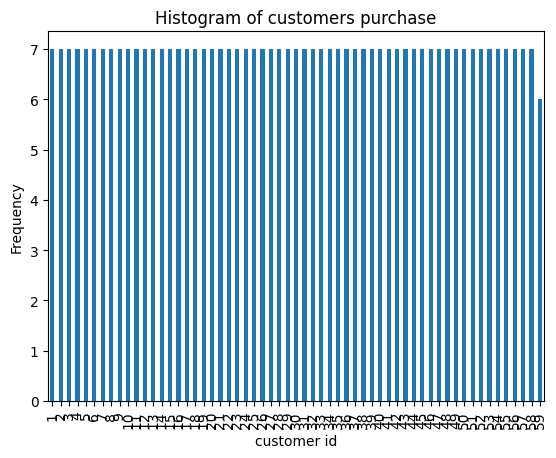

In [81]:
df['invoice']['CustomerId'].astype('category').value_counts().plot(kind='bar', title='Track Frequency')

plt.title('Histogram of customers purchase')
plt.xlabel('customer id')
plt.ylabel('Frequency')
plt.show()

In [82]:
df['invoice'].describe(include=['object']).T

,count,unique,top,freq
BillingAddress,412,59,Theodor-Heuss-Straße 34,7
BillingCity,412,53,Berlin,14
BillingState,210,25,CA,21
BillingCountry,412,24,USA,91
BillingPostalCode,384,55,70174,7


2.2.invoiceline

In [83]:
df['invoiceline'].head()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


In [84]:
df['invoiceline'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceLineId  2240 non-null   int64  
 1   InvoiceId      2240 non-null   int64  
 2   TrackId        2240 non-null   int64  
 3   UnitPrice      2240 non-null   float64
 4   Quantity       2240 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 87.6 KB


In [85]:
df['invoiceline'].describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceLineId,2240.0,1120.500000,646.776623,1.00,560.75,1120.50,1680.25,2240.00
InvoiceId,2240.0,206.868750,119.134877,1.00,103.00,207.00,311.00,412.00
TrackId,2240.0,1717.734375,993.797999,1.00,874.00,1708.00,2560.00,3500.00
UnitPrice,2240.0,1.039554,0.217069,0.99,0.99,0.99,0.99,1.99
Quantity,2240.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00


3.customer

In [86]:
df['customer'].head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [87]:
df['customer'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-null     object
 4   Address       59 non-null     object
 5   City          59 non-null     object
 6   State         30 non-null     object
 7   Country       59 non-null     object
 8   PostalCode    55 non-null     object
 9   Phone         58 non-null     object
 10  Fax           12 non-null     object
 11  Email         59 non-null     object
 12  SupportRepId  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


In [88]:
df['customer'].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,59.0,30.000000,17.175564,1.0,15.5,30.0,44.5,59.0
SupportRepId,59.0,3.949153,0.818403,3.0,3.0,4.0,5.0,5.0


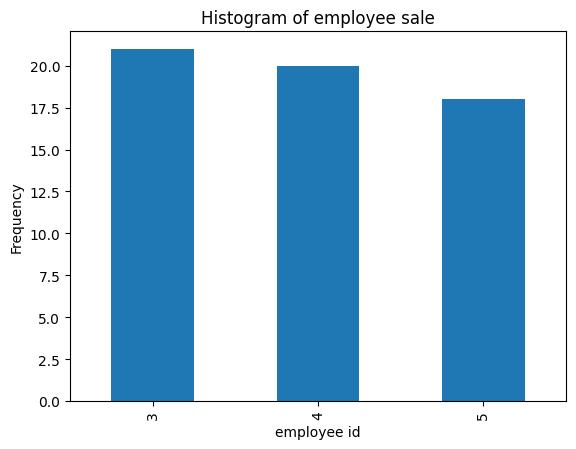

In [89]:
df['customer']['SupportRepId'].astype('category').value_counts().plot(kind='bar', title='Track Frequency')

plt.title('Histogram of employee sale')
plt.xlabel('employee id')
plt.ylabel('Frequency')
plt.show()

In [90]:
df['customer'].describe(include=['object']).T

,count,unique,top,freq
FirstName,59,57,Frank,2
LastName,59,59,Gonçalves,1
Company,10,10,Embraer - Empresa Brasileira de Aeronáutica S.A.,1
Address,59,59,"Av. Brigadeiro Faria Lima, 2170",1
City,59,53,Prague,2
State,30,25,SP,3
Country,59,24,USA,13
PostalCode,55,55,12227-000,1
Phone,58,58,+55 (12) 3923-5555,1
Fax,12,12,+55 (12) 3923-5566,1


4.Employee

In [91]:
df['employee'].head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [92]:
df['employee'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EmployeeId  8 non-null      int64         
 1   LastName    8 non-null      object        
 2   FirstName   8 non-null      object        
 3   Title       8 non-null      object        
 4   ReportsTo   7 non-null      float64       
 5   BirthDate   8 non-null      datetime64[ns]
 6   HireDate    8 non-null      datetime64[ns]
 7   Address     8 non-null      object        
 8   City        8 non-null      object        
 9   State       8 non-null      object        
 10  Country     8 non-null      object        
 11  PostalCode  8 non-null      object        
 12  Phone       8 non-null      object        
 13  Fax         8 non-null      object        
 14  Email       8 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(11)
memory usage: 1.1+ KB


In [93]:
df['employee'].describe().T

,count,mean,min,25%,50%,75%,max,std
EmployeeId,8.0,4.5,1.0,2.75,4.5,6.25,8.0,2.44949
ReportsTo,7.0,2.857143,1.0,1.5,2.0,4.0,6.0,2.193063
BirthDate,8,1964-12-10 03:00:00,1947-09-19 00:00:00,1961-05-02 00:00:00,1966-08-06 00:00:00,1971-03-07 06:00:00,1973-08-29 00:00:00,NaN
HireDate,8,2003-04-15 06:00:00,2002-04-01 00:00:00,2002-07-18 18:00:00,2003-07-25 12:00:00,2003-11-05 06:00:00,2004-03-04 00:00:00,NaN


In [94]:
df['employee'].describe(include=['object']).T

,count,unique,top,freq
LastName,8,8,Adams,1
FirstName,8,8,Andrew,1
Title,8,5,Sales Support Agent,3
Address,8,8,11120 Jasper Ave NW,1
City,8,3,Calgary,5
State,8,1,AB,8
Country,8,1,Canada,8
PostalCode,8,8,T5K 2N1,1
Phone,8,7,+1 (403) 262-3443,2
Fax,8,8,+1 (780) 428-3457,1


2.2. Key Variable

ploting num

1.hist and self plot

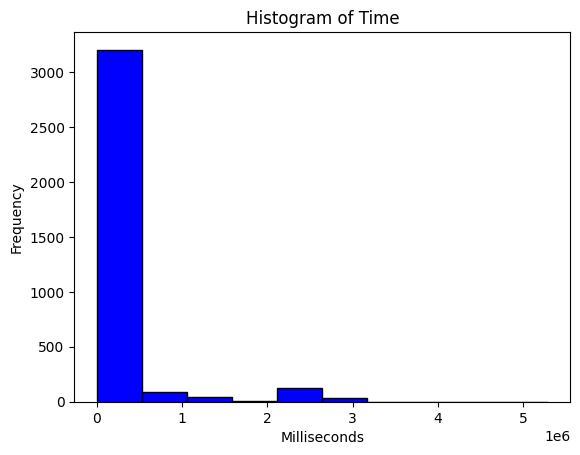

In [95]:

df['track']['Milliseconds'].plot(kind='hist', color='blue', edgecolor='black')

plt.title('Histogram of Time')
plt.xlabel('Milliseconds')
plt.ylabel('Frequency')
plt.show()


<Axes: xlabel='Milliseconds'>

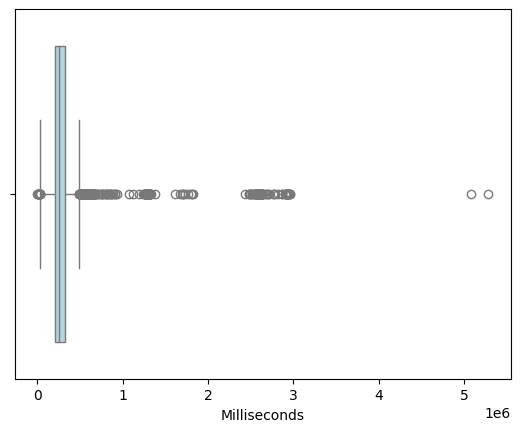

In [96]:
sns.boxplot(x= df['track']['Milliseconds'], color='lightblue')

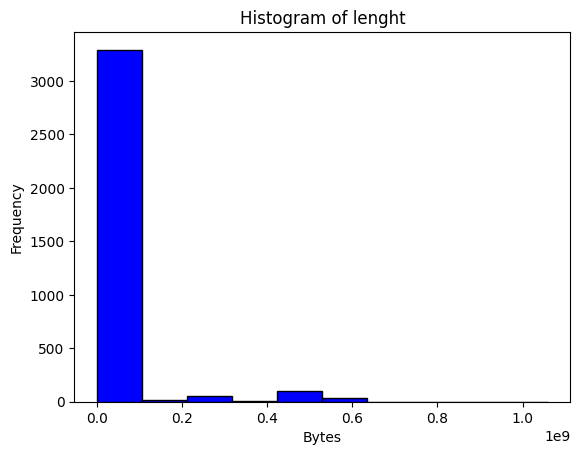

In [97]:

df['track']['Bytes'].plot(kind='hist', color='blue', edgecolor='black')

plt.title('Histogram of lenght')
plt.xlabel('Bytes')
plt.ylabel('Frequency')
plt.show()


<Axes: xlabel='Bytes'>

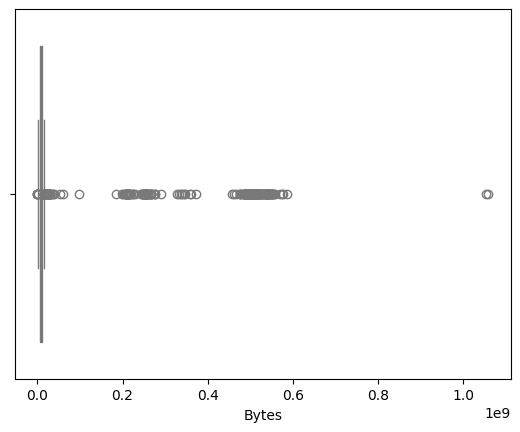

In [98]:
sns.boxplot(x= df['track']['Bytes'], color='lightblue')

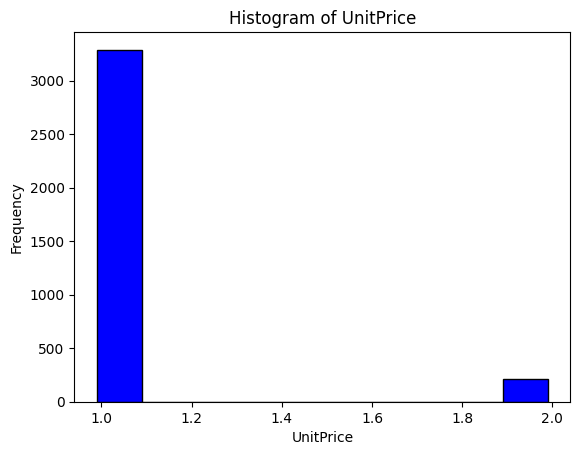

In [99]:

df['track']['UnitPrice'].plot(kind='hist', color='blue', edgecolor='black')

plt.title('Histogram of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

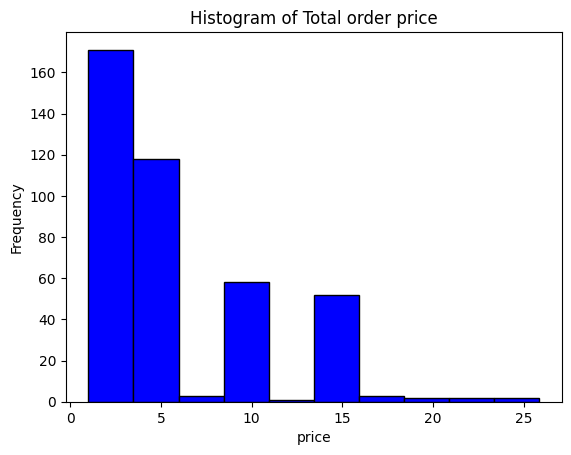

In [100]:
df['invoice']['Total'].plot(kind='hist', color='blue', edgecolor='black')

plt.title('Histogram of Total order price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

2.correlation

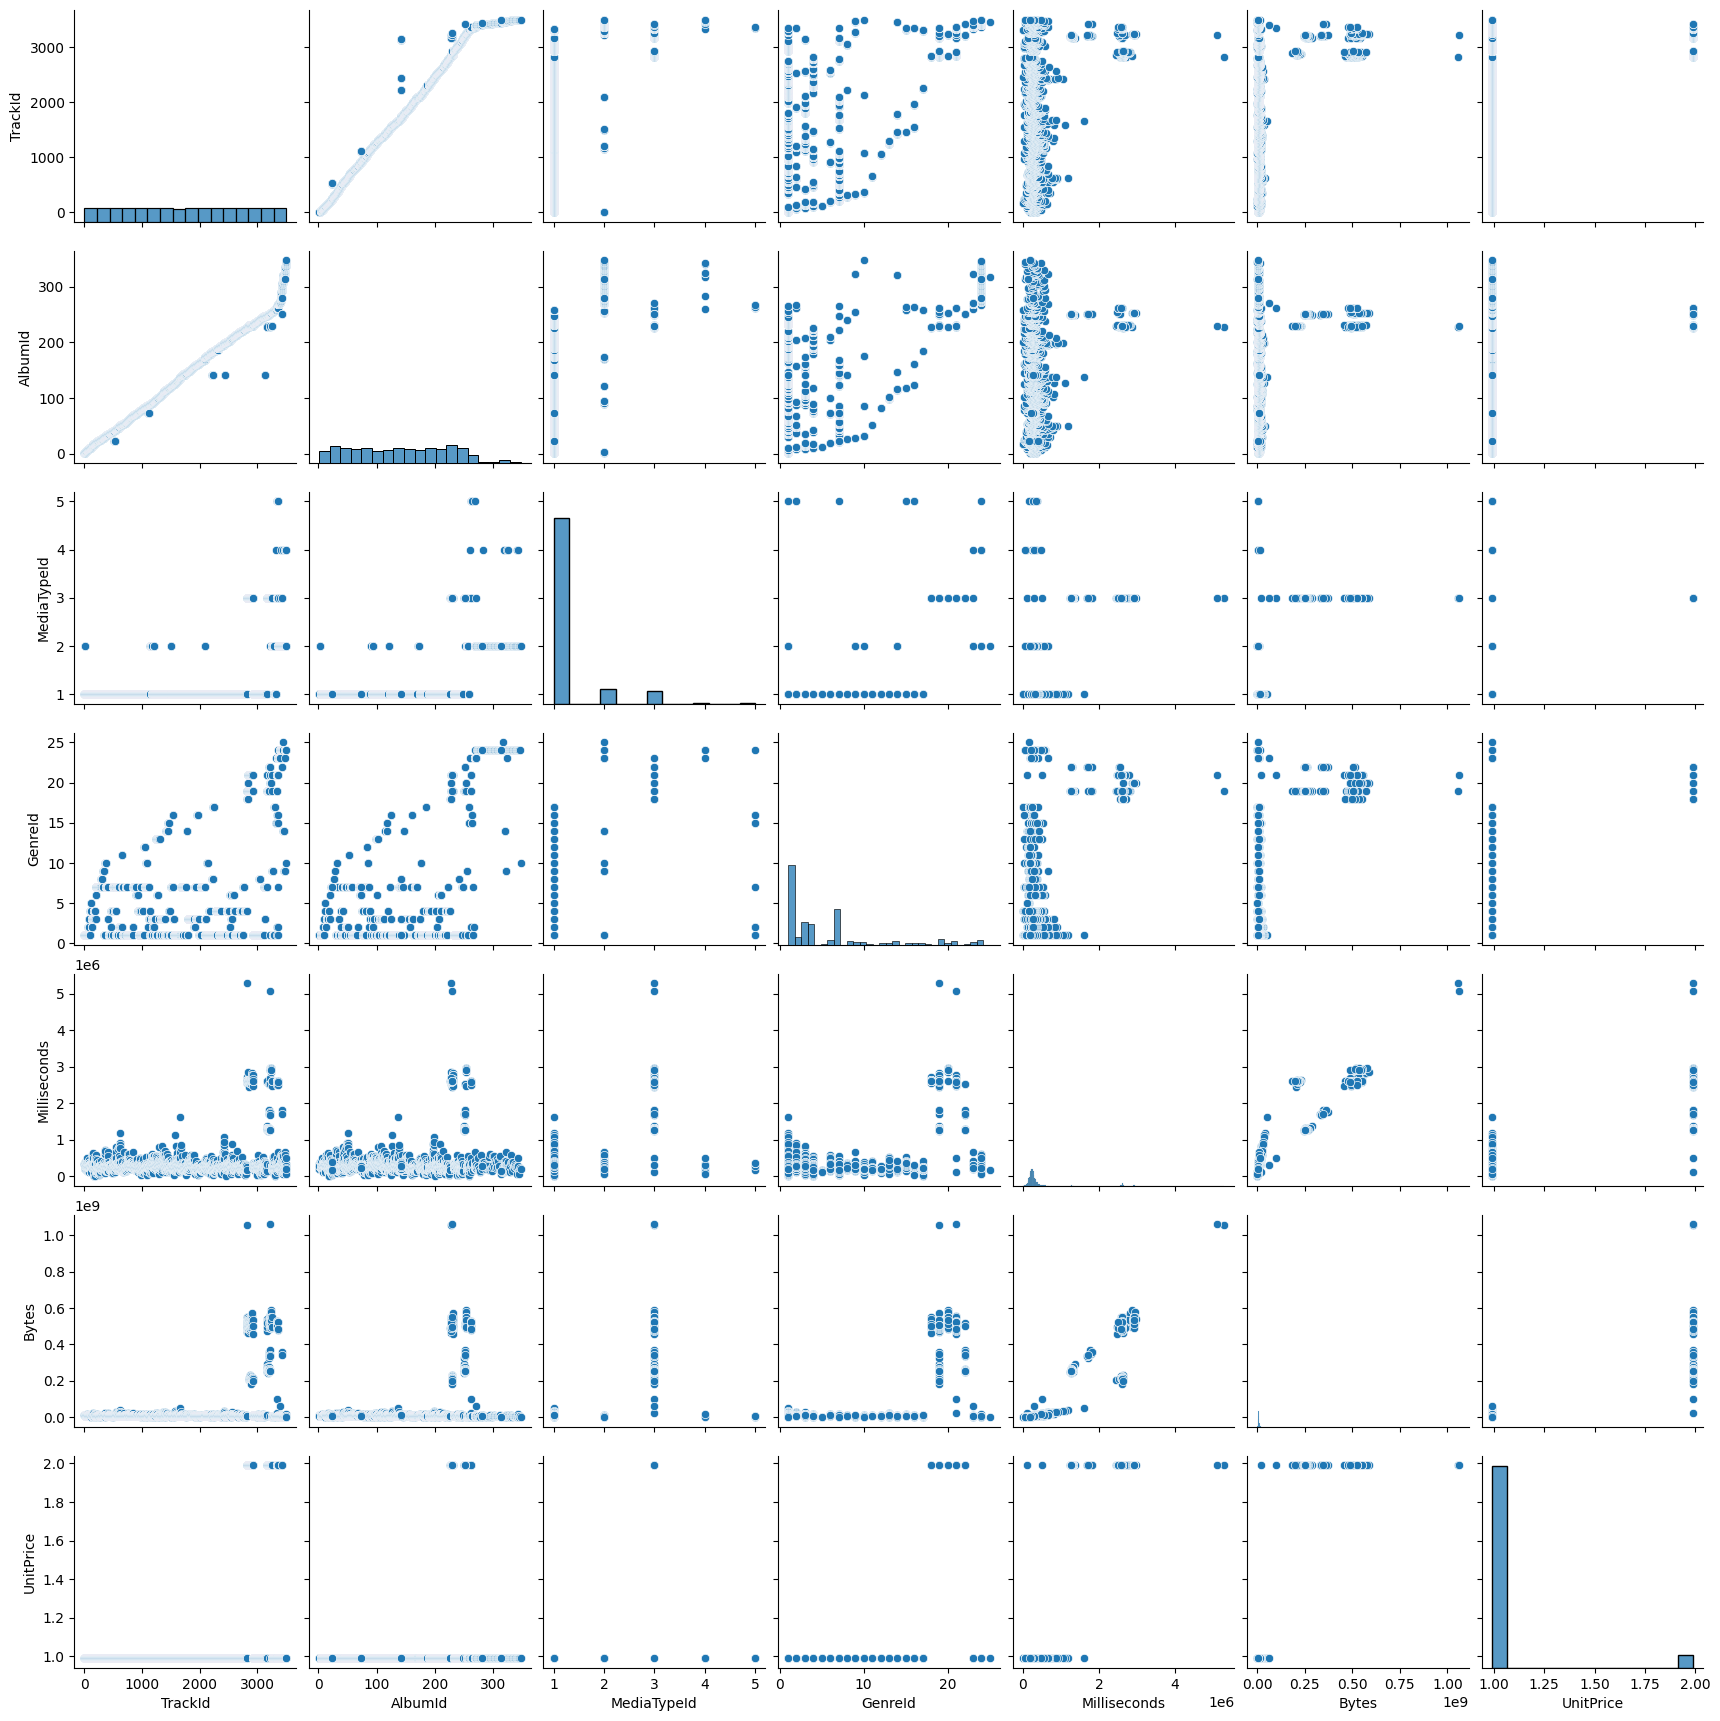

In [101]:
sns.pairplot(df['track'])

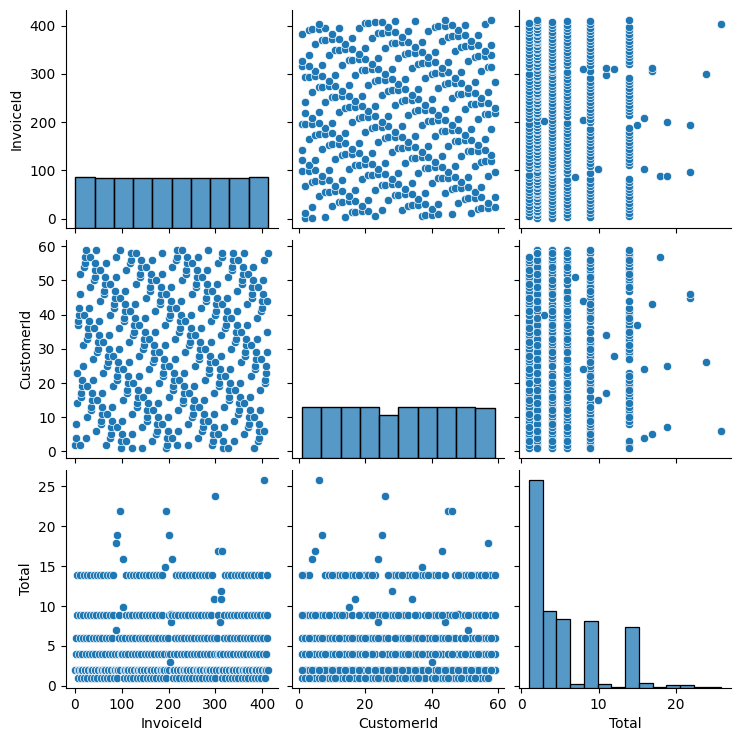

In [102]:
sns.pairplot(df['invoice'])

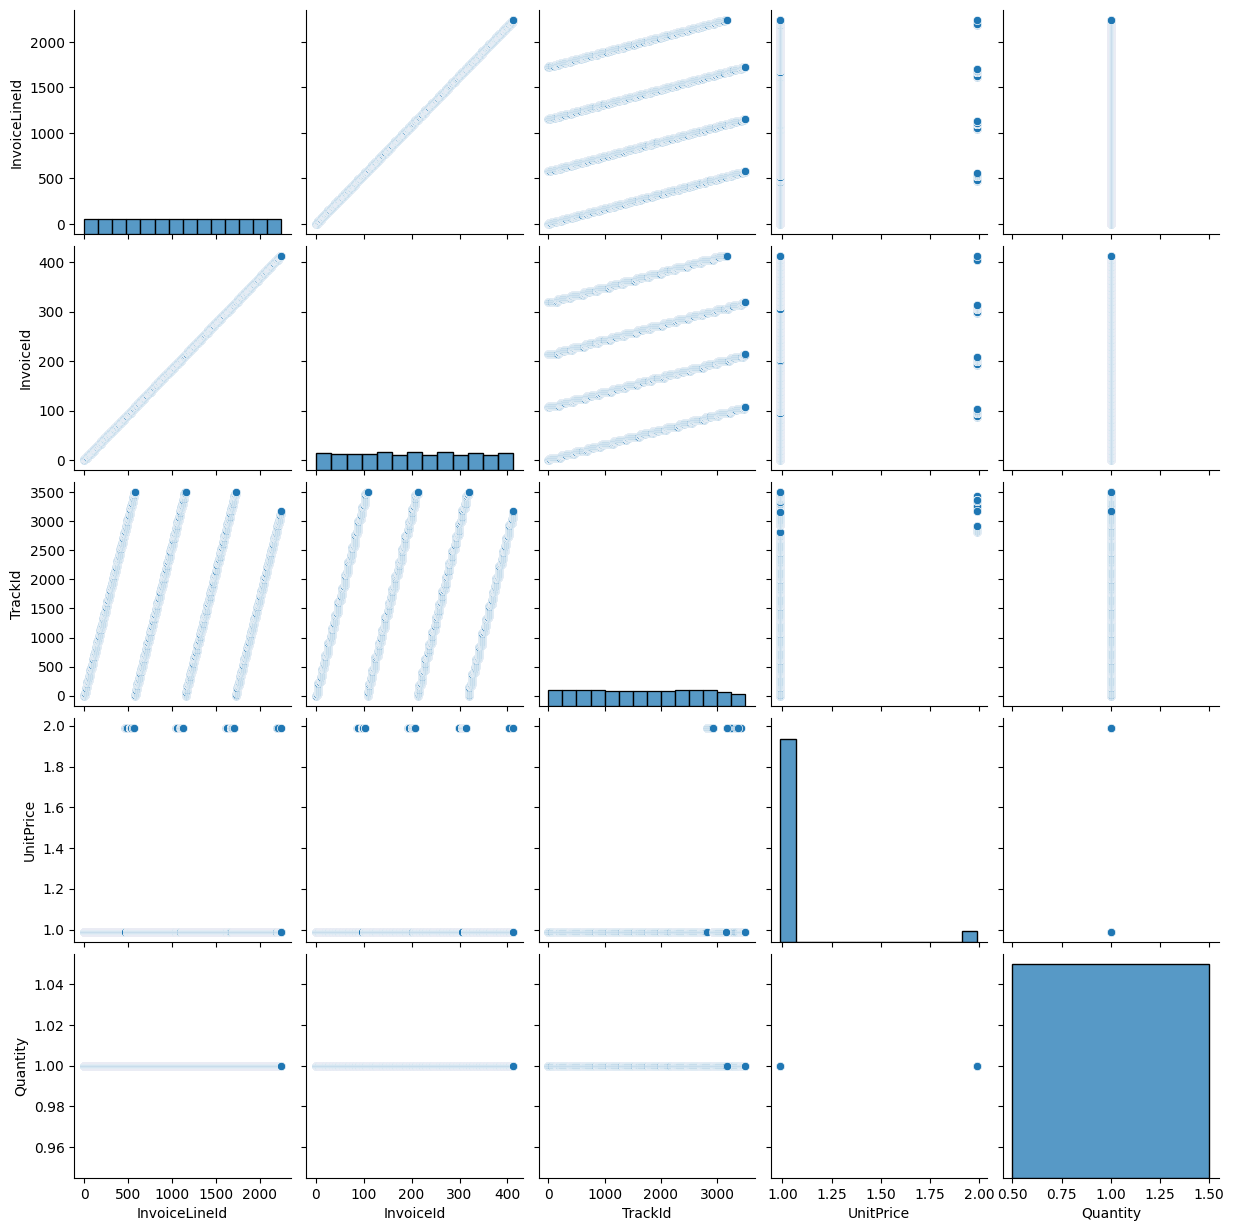

In [103]:
sns.pairplot(df['invoiceline'])

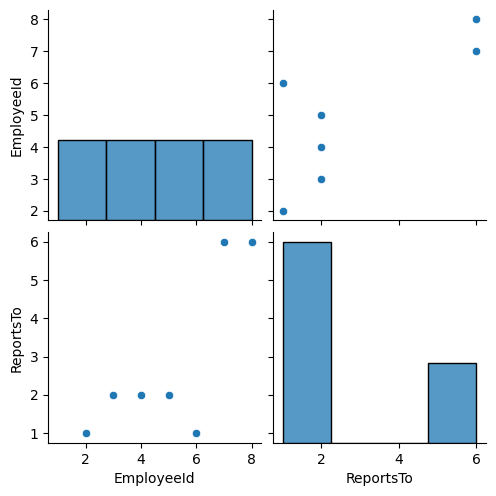

In [104]:
sns.pairplot(df['employee'])

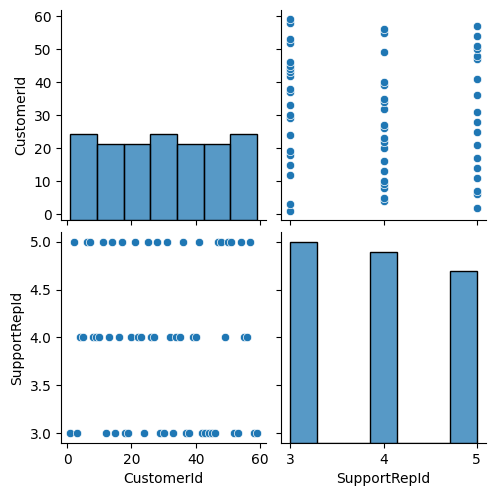

In [105]:
sns.pairplot(df['customer'])

faze3. Add total track income culem

1.total_tack_sale

In [106]:
df['invoiceline']['total_sale'] = df['invoiceline']['Quantity']*df['invoiceline']['UnitPrice']
df['invoiceline']

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,total_sale
0,1,1,2,0.99,1,0.99
1,2,1,4,0.99,1,0.99
2,3,2,6,0.99,1,0.99
3,4,2,8,0.99,1,0.99
4,5,2,10,0.99,1,0.99
...,...,...,...,...,...,...
2235,2236,411,3136,0.99,1,0.99
2236,2237,411,3145,0.99,1,0.99
2237,2238,411,3154,0.99,1,0.99
2238,2239,411,3163,0.99,1,0.99


In [125]:
df_sale_track = df['invoiceline'].groupby('TrackId')['total_sale'].sum().reset_index()
df_sale_track

,TrackId,total_sale
0,1,0.99
1,2,1.98
2,3,0.99
3,4,0.99
4,5,0.99
...,...,...
1979,3493,0.99
1980,3494,0.99
1981,3496,0.99
1982,3499,0.99


In [126]:
df_tarck_with_sale = pd.merge(df['track'],df_sale_track , on='TrackId' , how='outer')
df_tarck_with_sale

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,total_sale
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,0.99
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,1.98
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,0.99
...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) I Pini Della Vi...,343,2,24,None,286741,4718950,0.99,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,1.98
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,NaN
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,NaN


2.mean_of_tack_time_for_each_album

In [127]:
df_mean_time_for_album = df['track'].groupby('AlbumId')['Milliseconds'].mean().reset_index()
df_mean_time_for_album

,AlbumId,Milliseconds
0,1,240041.500000
1,2,342562.000000
2,3,286029.333333
3,4,306657.375000
4,5,294113.933333
...,...,...
342,343,286741.000000
343,344,139200.000000
344,345,66639.000000
345,346,221331.000000


3.sale for genre

In [129]:
df_sale_genre = df_tarck_with_sale.groupby('GenreId')['total_sale'].sum().reset_index()
df_sale_genre

,GenreId,total_sale
0,1,826.65
1,2,79.20
2,3,261.36
3,4,241.56
4,5,5.94
5,6,60.39
6,7,382.14
7,8,29.70
8,9,27.72
9,10,19.80


In [131]:
df_sale_genre_mean = df_tarck_with_sale.groupby('GenreId')['total_sale'].mean().reset_index()
df_sale_genre_mean

,GenreId,total_sale
0,1,1.109597
1,2,1.164706
2,3,1.131429
3,4,1.189951
4,5,0.990000
5,6,1.139434
6,7,1.123941
7,8,1.060714
8,9,1.066154
9,10,1.042105


4.customer clustering

In [132]:
df_sale_track

,TrackId,total_sale
0,1,0.99
1,2,1.98
2,3,0.99
3,4,0.99
4,5,0.99
...,...,...
1979,3493,0.99
1980,3494,0.99
1981,3496,0.99
1982,3499,0.99


In [142]:
df_customer_purcashe = pd.merge(
    df['customer'][['CustomerId','LastName']],df['invoice'][['CustomerId','InvoiceId']], on='CustomerId', how='inner').merge(
        df['invoiceline'][['total_sale','InvoiceId','TrackId']]).groupby('CustomerId')['total_sale'].sum().reset_index()
df_customer_purcashe

,CustomerId,total_sale
0,1,39.62
1,2,37.62
2,3,39.62
3,4,39.62
4,5,40.62
5,6,49.62
6,7,42.62
7,8,37.62
8,9,37.62
9,10,37.62
